In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv("../data_train_125ft.csv")
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,0.0,87.0,1.0,14.0,712.000000,696.0,65.440519,240.0,0.703359,-0.246387,...,712.000000,696.0,65.707979,240.0,0.699256,-0.277091,783.821985,0.785714,9.0,6.0
1,2.0,49.0,1.0,13.0,712.000000,691.0,47.300458,158.0,0.884010,-0.332635,...,712.000000,691.0,47.483330,156.0,0.894198,-0.355280,380.188159,1.000000,13.0,12.0
2,1.0,86.0,1.0,9.0,1096.250000,1098.0,8.150920,28.0,-0.156675,-0.642487,...,1096.000000,1098.0,8.426150,28.0,-0.160466,-0.801230,808.359965,1.000000,8.0,6.0
3,1.0,70.0,1.0,8.0,1169.714286,1168.0,4.463000,14.0,0.642283,-0.722722,...,1169.428571,1168.0,4.237828,14.0,0.827427,-0.140248,1150.133430,1.000000,8.0,7.0
4,3.0,61.0,0.0,16.0,585.333333,586.0,2.890598,12.0,0.196283,0.113400,...,585.333333,586.0,3.155243,12.0,0.354663,-0.484056,198.042444,1.000000,16.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8343,0.0,72.0,1.0,16.0,619.466667,592.0,139.659522,480.0,0.480046,-0.842798,...,619.466667,594.0,139.562109,482.0,0.472791,-0.825913,468.155165,1.000000,16.0,8.0
8344,3.0,23.0,0.0,19.0,510.777778,512.0,7.091118,30.0,-0.059891,-0.269851,...,510.888889,512.0,6.870944,28.0,0.081059,-0.433829,309.210006,1.000000,19.0,18.0
8345,1.0,51.0,0.0,9.0,1090.250000,1088.0,9.769212,30.0,0.213875,-1.152589,...,1090.250000,1088.0,8.742854,28.0,0.436427,-0.891096,940.155678,1.000000,9.0,8.0
8346,3.0,45.0,0.0,26.0,370.320000,370.0,3.133305,10.0,0.358316,-0.885061,...,370.400000,370.0,3.098387,12.0,0.051640,-0.703333,856.813033,0.461538,1.0,6.0


In [3]:
x_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values

In [4]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)

In [5]:
df_test = pd.read_csv("../data_test_125ft.csv")
df_test.drop(columns=["Unnamed: 0"],inplace=True)
df_test

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,1.0,32.0,0.0,9.0,1091.750000,1091.0,22.280877,66.0,0.493022,-0.931472,...,1092.000000,1091.0,22.000000,66.0,0.521225,-0.913087,373.995302,1.0,9.0,7.0
1,1.0,17.0,0.0,9.0,1115.000000,1106.0,59.841457,186.0,0.777480,-0.423745,...,1115.000000,1107.0,60.728906,192.0,0.772436,-0.395166,477.271172,1.0,9.0,8.0
2,2.0,64.0,0.0,12.0,806.000000,804.0,8.045326,30.0,0.293282,-0.392690,...,806.000000,804.0,7.722458,26.0,0.198976,-0.896193,277.972651,1.0,12.0,11.0
3,3.0,61.0,0.0,21.0,458.300000,458.0,1.705872,6.0,0.192180,-0.770964,...,458.300000,458.0,1.926136,6.0,0.368600,-0.876527,361.998395,1.0,0.0,20.0
4,1.0,70.0,1.0,10.0,941.555556,1054.0,220.140920,628.0,-1.482314,0.419095,...,1059.250000,1059.0,10.341059,34.0,-0.061463,-0.843856,586.261896,1.0,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,3.0,71.0,0.0,20.0,485.789474,486.0,3.104817,10.0,-0.415255,-0.874744,...,485.789474,486.0,2.966106,10.0,-0.496663,-0.494835,798.662084,1.0,10.0,19.0
2084,1.0,51.0,1.0,9.0,1060.250000,1056.0,14.677789,44.0,0.273677,-1.204916,...,1060.250000,1056.0,13.872184,40.0,0.231747,-1.352375,603.272611,1.0,9.0,8.0
2085,1.0,61.0,1.0,9.0,1070.250000,1076.0,33.082284,98.0,-0.016678,-1.320021,...,1070.250000,1075.0,32.686962,96.0,0.030170,-1.329810,692.057509,1.0,9.0,4.0
2086,1.0,74.0,1.0,9.0,1021.750000,1018.0,7.171994,22.0,0.898849,-0.581729,...,1021.750000,1020.0,7.101936,24.0,0.839867,-0.281413,456.052143,1.0,9.0,8.0


In [6]:
x_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [7]:
x_test = scale.transform(x_test)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train , test_size=0.5, shuffle=True, stratify=y_train, random_state=119)
print(f"Train: {x_train.shape}")
print(f"Vallidation: {x_val.shape}")

Train: (4174, 123)
Vallidation: (4174, 123)


In [9]:
rf_clf = RandomForestClassifier(criterion= 'log_loss', max_depth= 5, max_features= 'sqrt', n_estimators= 1000)
ab_clf = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 0.1, n_estimators= 50)
knn_clf = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'uniform')
svc_clf = SVC(C= 100, gamma= 'scale', kernel= 'rbf', probability= True)
xgb_clf = XGBClassifier(gamma= 0,learning_rate= 0.1,max_depth= 5,min_child_weight= 1,n_estimators= 1000)
dt_clf = DecisionTreeClassifier(criterion= 'entropy',max_depth= 5,max_features= 'sqrt',splitter= 'best')

In [10]:
# Huấn luyện các mô hình con
rf_clf.fit(x_train,y_train)
ab_clf.fit(x_train, y_train)
knn_clf.fit(x_train, y_train)
svc_clf.fit(x_train, y_train)
xgb_clf.fit(x_train, y_train)
dt_clf.fit(x_train,y_train)

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

In [11]:
# Dự đoán trên tập huấn luyện để tạo đặc trưng mới cho mô hình blending
X_train_meta = np.column_stack((
    rf_clf.predict_proba(x_val),
    ab_clf.predict_proba(x_val),
    knn_clf.predict_proba(x_val),
    svc_clf.predict_proba(x_val),
    xgb_clf.predict_proba(x_val),
    dt_clf.predict_proba(x_val)
))
# Dự đoán trên tập kiểm tra để tạo đặc trưng mới cho mô hình blending
X_test_meta = np.column_stack((
    rf_clf.predict_proba(x_test),
    ab_clf.predict_proba(x_test),
    knn_clf.predict_proba(x_test),
    svc_clf.predict_proba(x_test),
    xgb_clf.predict_proba(x_test),
    dt_clf.predict_proba(x_test)
))

In [12]:
print(f"X_train_meta:{X_train_meta.shape}")
print(f"X_test_meta:{X_test_meta.shape}")

X_train_meta:(4174, 24)
X_test_meta:(2088, 24)


In [14]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
model = LGBMClassifier()
params = {
    'objective':['multiclass'],
    'boosting':['gbdt', 'rf', 'dart'],
    'data_sample_strategy':['bagging', 'goss'],
    'learning_rate':[0.01,0.1,1],
    'estimators':[50,100,200]
}
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, verbose=5, return_train_score=True,refit=True)
grid_model = grid_search.fit(X_train_meta,y_val)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[LightGBM] [Warning] Unknown parameter: estimators
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: estimators
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4110
[LightGBM] [Info] Number of data points in the train set: 2782, number of used features: 24
[LightGBM] [Info] Start training from score -1.566175
[LightGBM] [Info] Start training from score -0.990703
[LightGBM] [Info] Start training from score -1.550803
[LightGBM] [Info] Start training from score -1.571352
[LightGBM] [Warning] No further splits with positive

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
27 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\anaconda3\envs\testdatasets\lib\site-packages\lightgbm\sklearn.py", line 1268, in fit
    super().fit(
  File "c:\Users\Admin\anaconda3\envs\testdatasets\lib\site-packages\lightgbm\sklearn.py", line 954, in fit
    self._Booster = train(
  File "c:

In [15]:
result_test = grid_model.predict(X_test_meta)

[LightGBM] [Warning] Unknown parameter: estimators
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


In [16]:
grid_model.best_params_

{'boosting': 'rf',
 'data_sample_strategy': 'goss',
 'estimators': 50,
 'learning_rate': 1,
 'objective': 'multiclass'}

In [17]:
grid_model.best_score_

0.9489698072722565

In [18]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
def evaluation_test(y,y_pred):
    cm = confusion_matrix(y,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
    disp.plot()
    plt.show()
    n_classes = len(cm)
    result = []
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc = (tp+tn) / (tp+fn+tn+fp)
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        if c+1 == 1:
            Rhythm = 'AFIB'
        elif c+1 == 2:
            Rhythm = 'SB'
        elif c+1 == 3:
            Rhythm = 'SR'
        else:
            Rhythm = 'GSVT'
        result.append([Rhythm,acc,recall,precision,f1_score,specificity])
    p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
    p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
    p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
    result.append(['macro avg',None,f_macro,p_macro,r_macro,None])
    result.append(['micro avg',None,f_micro,p_micro,r_micro,None])
    result.append(['weighted avg',None,f_weighted,p_weighted,r_weighted,None])
    return result
        

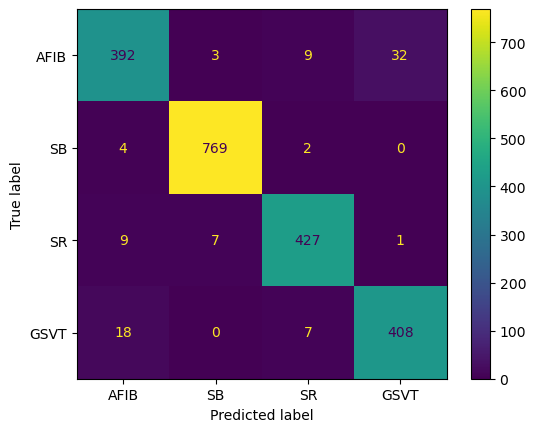

,Rhythm Group,ACC,F1-score,Precision,Recall,specificity
0,AFIB,0.964080,0.899083,0.926714,0.912689,0.981235
1,SB,0.992337,0.992258,0.987163,0.989704,0.992384
2,SR,0.983238,0.961712,0.959551,0.960630,0.989051
3,GSVT,0.972222,0.942263,0.925170,0.933638,0.980060
4,macro avg,NaN,0.949165,0.949649,0.948829,NaN
5,micro avg,NaN,0.955939,0.955939,0.955939,NaN
6,weighted avg,NaN,0.955813,0.955813,0.955939,NaN


In [19]:
evaluation_test = evaluation_test(y_test,result_test)
df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","F1-score","Precision","Recall","specificity"])
df_evaluation_test

In [20]:
df_evaluation_test.to_csv("../Result/Blending_LGB_125ft.csv")